**Import libraries**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
# Import Dataset
data = pd.read_csv('/content/graduation data set.csv')
data.shape

(400, 9)

In [35]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [36]:
data.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

In [37]:
data.drop('Serial No.', axis=1, inplace=True)

In [38]:
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

**Data Analysis**

In [39]:
#Let's see top 10 observation row and column wise
data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [40]:
## General statistics of the data
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [41]:
# reading the dataset
df = pd.read_csv('/content/graduation data set.csv')
df.shape

(400, 9)

In [42]:
# it may be needed in the future.
serialNo = df["Serial No."].values
df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [43]:
X = df.drop(["Chance of Admit"],axis=1)
y = df["Chance of Admit"].values

In [44]:
# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

In [45]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

In [46]:
y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]

# list to array
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

**Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train_01)

LogisticRegression()

In [48]:
y_predlogr = logr.predict(X_test)

In [49]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_predlogr, y_test_01))

Accuracy Score: 0.975


In [50]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_01,y_predlogr))
cm_lrc = confusion_matrix(y_test_01,y_predlogr)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

[[67  1]
 [ 1 11]]


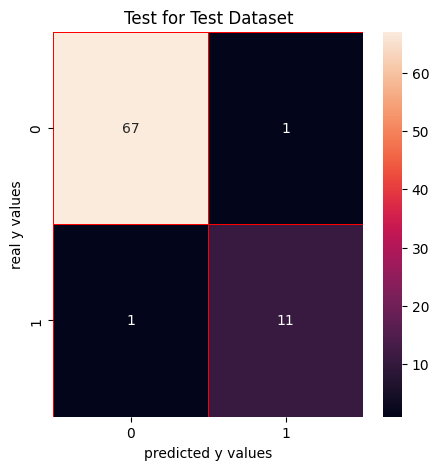

In [51]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [52]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_predlogr))
print("recall_score: ", recall_score(y_test_01, y_predlogr))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_predlogr))

precision_score:  0.9166666666666666
recall_score:  0.9166666666666666
f1_score:  0.9166666666666666


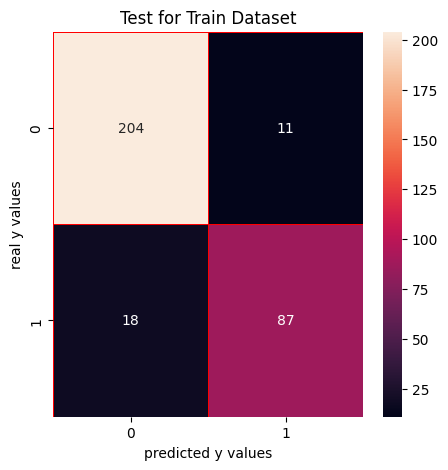

In [53]:
#Test for Train Dataset
cm_lrc_train = confusion_matrix(y_train_01,logr.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

**Support Vector Machine**

In [54]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train,y_train_01)
y_pred_svm = svm.predict(X_test)
print("score: ", svm.score(X_test,y_test_01))

score:  0.9375


In [55]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test_01,y_pred_svm)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_svm

array([[65,  3],
       [ 2, 10]])

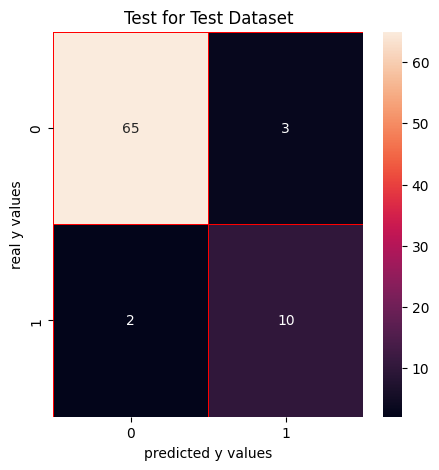

In [56]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [57]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_svm))
print("recall_score: ", recall_score(y_test_01,y_pred_svm))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_svm))

precision_score:  0.7692307692307693
recall_score:  0.8333333333333334
f1_score:  0.8


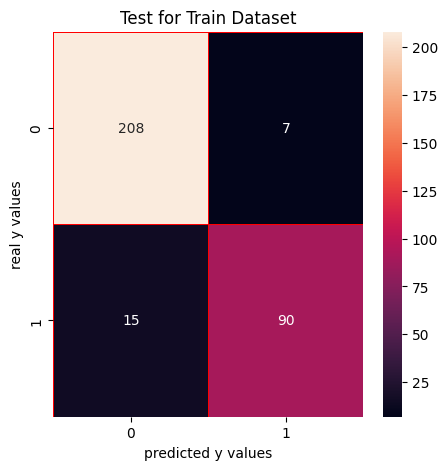

In [58]:
#Test for Train Dataset

cm_svm_train = confusion_matrix(y_train_01, svm.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm_train, annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

**Decision Tree Classification**

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train_01)
y_pred_dtc = dtc.predict(X_test)
print("score: ", dtc.score(X_test,y_test_01))

score:  0.9375


In [60]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test_01, y_pred_dtc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_dtc


array([[65,  3],
       [ 2, 10]])

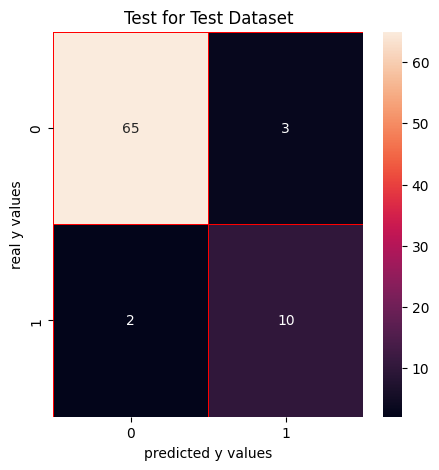

In [61]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

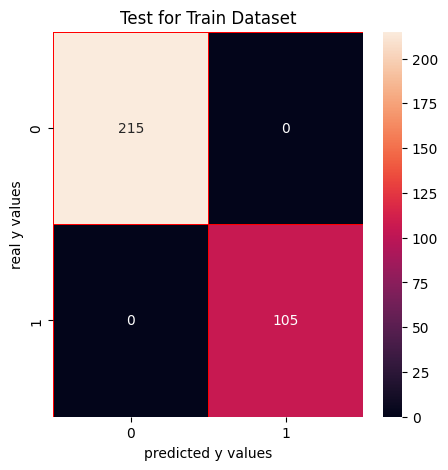

In [62]:
#Test for Train Dataset:
cm_dtc_train = confusion_matrix(y_train_01,dtc.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

**Random Forest Classification**

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,random_state = 1)
rfc.fit(X_train,y_train_01)

y_pred_rfc = rfc.predict(X_test)

print("score: ", rfc.score(X_test, y_test_01))

score:  0.9375


In [64]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test_01, y_pred_rfc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_rfc

array([[65,  3],
       [ 2, 10]])

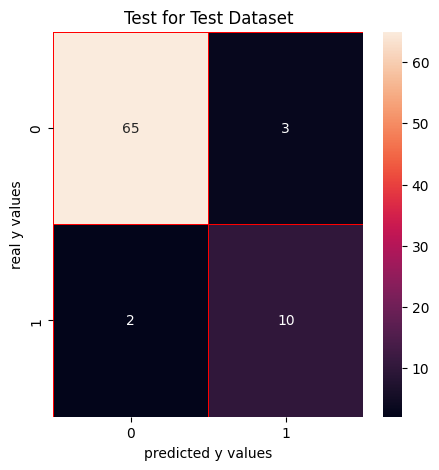

In [65]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [66]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_rfc))
print("recall_score: ", recall_score(y_test_01, y_pred_rfc))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_rfc))

precision_score:  0.7692307692307693
recall_score:  0.8333333333333334
f1_score:  0.8


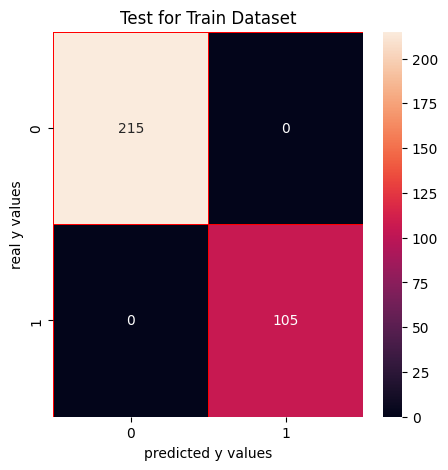

In [67]:
#Test for Train Dataset:

cm_rfc_train = confusion_matrix(y_train_01, rfc.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

**K Nearest Neighbors Classification**

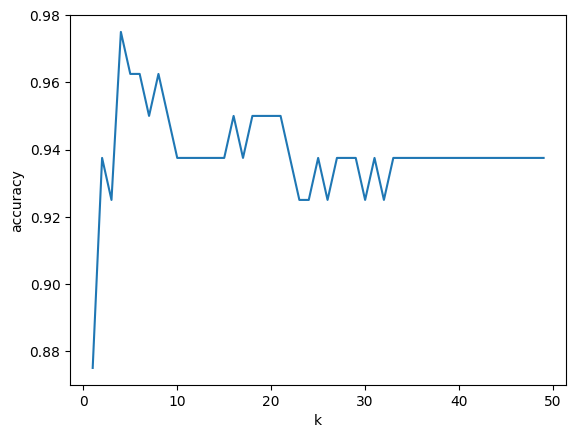

In [68]:
from sklearn.neighbors import KNeighborsClassifier

# finding k value
scores = []
for each in range(1,50):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(X_train, y_train_01)
    scores.append(knn_n.score(X_test, y_test_01))

plt.plot(range(1,50),scores)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [69]:
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(X_train, y_train_01)

y_pred_knn = knn.predict(X_test)
print("score of 3 :",knn.score(X_test,y_test_01))

score of 3 : 0.925


In [70]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test_01, y_pred_knn)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_knn

array([[63,  5],
       [ 1, 11]])

In [71]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_knn))
print("recall_score: ", recall_score(y_test_01, y_pred_knn))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_knn))

precision_score:  0.6875
recall_score:  0.9166666666666666
f1_score:  0.7857142857142857


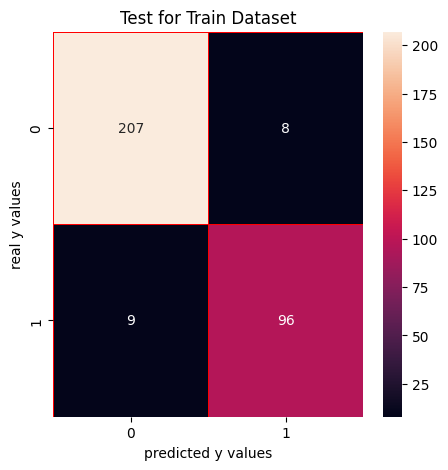

In [72]:
cm_knn_train = confusion_matrix(y_train_01,knn.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

**Error Rates for Algorithms**

**MAE, MAPE, RMSE error rates in logistic regression**

In [73]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate synthetic dataset for regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
lr_mae = mean_absolute_error(y_test, lr_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
lr_mape = mean_absolute_percentage_error(y_test, lr_pred)

# Calculate Root Mean Squared Error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

# Print error rates
print("Error Rates for Linear Regression:")
print("Mean Absolute Error (MAE):", lr_mae)
print("Mean Absolute Percentage Error (MAPE):", lr_mape)
print("Root Mean Squared Error (RMSE):", lr_rmse)


Error Rates for Linear Regression:
Mean Absolute Error (MAE): 0.07773328130097608
Mean Absolute Percentage Error (MAPE): 0.21355212292479647
Root Mean Squared Error (RMSE): 0.0975290464960002


**MAE, MAPE, RMSE error rates in Support Vector Machine**

In [74]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Generate synthetic dataset for regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Regression
svm_model = SVR(kernel='linear')  # You can choose different kernels ('linear', 'poly', 'rbf', etc.)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
svm_mae = mean_absolute_error(y_test, svm_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
svm_mape = mean_absolute_percentage_error(y_test, svm_pred)

# Calculate Root Mean Squared Error (RMSE)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))

# Print error rates
print("Error Rates for Support Vector Regression (SVM):")
print("Mean Absolute Error (MAE):", svm_mae)
print("Mean Absolute Percentage Error (MAPE):", svm_mape)
print("Root Mean Squared Error (RMSE):", svm_rmse)


Error Rates for Support Vector Regression (SVM):
Mean Absolute Error (MAE): 0.08034971467537222
Mean Absolute Percentage Error (MAPE): 0.2138065681003479
Root Mean Squared Error (RMSE): 0.10091852930975137


**MAE,MAPE, RMSE error rates in Random Forest**

In [75]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Generate synthetic dataset for regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
rf_mae = mean_absolute_error(y_test, rf_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rf_mape = mean_absolute_percentage_error(y_test, rf_pred)

# Calculate Root Mean Squared Error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

# Print error rates
print("Error Rates for Random Forest Regression:")
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Absolute Percentage Error (MAPE):", rf_mape)
print("Root Mean Squared Error (RMSE):", rf_rmse)


Error Rates for Random Forest Regression:
Mean Absolute Error (MAE): 40.177080494230346
Mean Absolute Percentage Error (MAPE): 93.62184826894912
Root Mean Squared Error (RMSE): 51.20344866411072


**MAE,MAPE, RMSE error rates in Decision Trees**

In [76]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Generate synthetic dataset for regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_pred = dt_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
dt_mae = mean_absolute_error(y_test, dt_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
dt_mape = mean_absolute_percentage_error(y_test, dt_pred)

# Calculate Root Mean Squared Error (RMSE)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))

# Print error rates
print("Error Rates for Decision Tree Regression:")
print("Mean Absolute Error (MAE):", dt_mae)
print("Mean Absolute Percentage Error (MAPE):", dt_mape)
print("Root Mean Squared Error (RMSE):", dt_rmse)


Error Rates for Decision Tree Regression:
Mean Absolute Error (MAE): 61.95266831566605
Mean Absolute Percentage Error (MAPE): 205.0703910120886
Root Mean Squared Error (RMSE): 79.68957138012644


**MAE,MAPE, RMSE error rates in KNN**

In [77]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Generate synthetic dataset for regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

# Predict on the test set
knn_pred = knn_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
knn_mae = mean_absolute_error(y_test, knn_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
knn_mape = mean_absolute_percentage_error(y_test, knn_pred)

# Calculate Root Mean Squared Error (RMSE)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))

# Print error rates
print("Error Rates for K-Nearest Neighbors (KNN) Regression:")
print("Mean Absolute Error (MAE):", knn_mae)
print("Mean Absolute Percentage Error (MAPE):", knn_mape)
print("Root Mean Squared Error (RMSE):", knn_rmse)


Error Rates for K-Nearest Neighbors (KNN) Regression:
Mean Absolute Error (MAE): 48.86073406351671
Mean Absolute Percentage Error (MAPE): 129.09868615163862
Root Mean Squared Error (RMSE): 61.060169455816194


                                  Model         MAE        MAPE       RMSE  \
0                   logistic Regression    0.077733    0.213552   0.097529   
1       Support Vector Regression (SVM)    0.080350    0.213807   0.100919   
2              Random Forest Regression   40.177080   93.621848  51.203449   
3              Decision Tree Regression  205.070391  205.070391  79.689571   
4  K-Nearest Neighbors (KNN) Regression   48.860734  129.098686  61.060169   

   Accuracy  
0  0.999999  
1  0.999999  
2  0.844599  
3  0.623592  
4  0.779010  


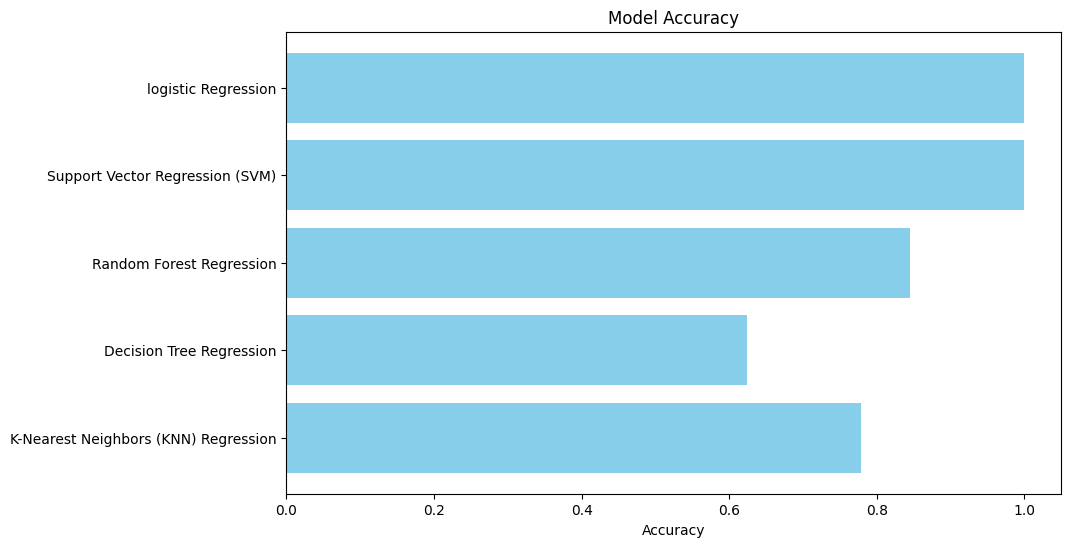

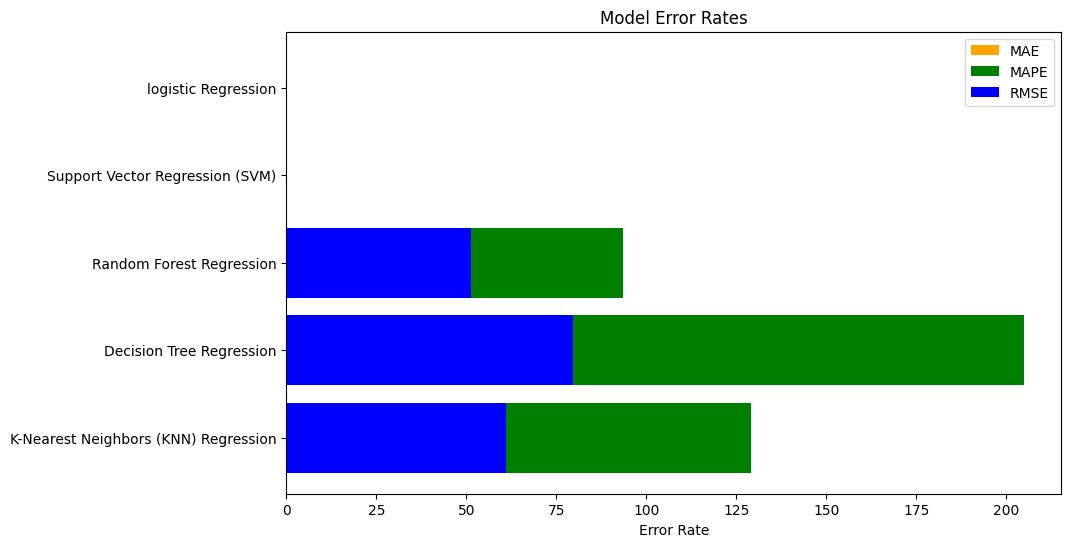

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Results for each model
results = {
    "Model": ["logistic Regression", "Support Vector Regression (SVM)", "Random Forest Regression", "Decision Tree Regression", "K-Nearest Neighbors (KNN) Regression"],
    "MAE": [lr_mae, svm_mae, rf_mae, dt_mape, knn_mae],
    "MAPE": [lr_mape, svm_mape, rf_mape, dt_mape, knn_mape],
    "RMSE": [lr_rmse, svm_rmse, rf_rmse, dt_rmse, knn_rmse],
    "Accuracy": [lr_model.score(X_test, y_test), svm_model.score(X_test, y_test), rf_model.score(X_test, y_test), dt_model.score(X_test, y_test), knn_model.score(X_test, y_test)]
}

# Creating DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.barh(results_df["Model"], results_df["Accuracy"], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy on top
plt.show()

# Plotting error rates
plt.figure(figsize=(10, 6))
plt.barh(results_df["Model"], results_df["MAE"], color='orange', label='MAE')
plt.barh(results_df["Model"], results_df["MAPE"], color='green', label='MAPE')
plt.barh(results_df["Model"], results_df["RMSE"], color='blue', label='RMSE')
plt.xlabel('Error Rate')
plt.title('Model Error Rates')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the lowest error rate on top
plt.show()
